<a href="https://colab.research.google.com/github/Amal-Emad/Arabic-Sentiment-Analysis_/blob/main/ArabicSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arabic Sentiment Analysis: ML & Deep Learning

This project focuses on Arabic sentiment analysis using both machine learning and deep learning models. The dataset consists of Arabic reviews, which are preprocessed through text cleaning, tokenization, and feature extraction. The goal is to classify sentiment using SVM, Random Forest, and Bidirectional LSTM, comparing their effectiveness.
Key Steps
1. Data Preprocessing

    Dataset: Arabic reviews from ar_reviews_100k.tsv.
    Cleaning: Removing emojis, special characters, URLs, and normalizing Arabic letters.
    Tokenization & Stopwords Removal: Using NLTK to process Arabic text.
    Feature Engineering: Extracting text length and word count for analysis.

2. Machine Learning Models

    TF-IDF Vectorization for feature extraction.
    SVM Classifier (RBF kernel).
    Random Forest Classifier (50 estimators).

3. Deep Learning Model

    Bidirectional LSTM (BiLSTM)
        Uses Keras' Embedding layer.
        Dropout layers to prevent overfitting.
        Softmax activation for multi-class classification.
        Trained for 15 epochs using Adam optimizer.

4. Evaluation & Results

    Confusion Matrices & Accuracy Scores to assess performance.
    Classification Reports for model insights.
    Comparison of ML vs. Deep Learning in sentiment classification.

5. Deployment & Predictions

    Models saved as svm_pipeline.pkl, RandFores_pipeline.pkl, and lstm_model.h5.
    Function added for real-time sentiment prediction from Arabic text.

# 1. Importing Libraries

Preprocessing (NLTK, re, emoji) → To clean and prepare the Arabic text.

Data Handling (Pandas, NumPy, OS) → To load, manipulate, and organize the dataset.

Machine Learning & Deep Learning (Keras, TensorFlow) → To train different sentiment analysis models.

Visualization (WordCloud) → To better understand word frequency in the dataset.

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import os
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import keras
import tensorflow as tf
from wordcloud import WordCloud
from tensorflow.keras import layers, models, losses, Sequential, optimizers, metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Loading and Exploring the Dataset

This section loads the dataset, checks for missing values, explores sentiment distribution, and extracts useful text statistics.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ar_reviews_100k.tsv', sep='\t')
df.head()



,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   99999 non-null  object
 1   text    99999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

,0
label,0
text,0


In [ ]:
df['label'].value_counts()

,count
label,
Positive,33333
Mixed,33333
Negative,33333


<ipython-input-11-8c0e0f95d69c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="label", palette="viridis")


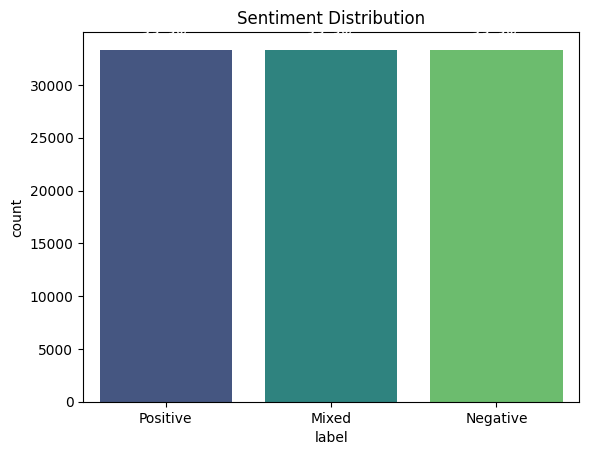

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#countplot
ax = sns.countplot(data=df, x="label", palette="viridis")


total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white',
                xytext=(0, 10), textcoords='offset points')

plt.title("Sentiment Distribution")
plt.show()



In [ ]:
df["word_count"] = df["text"].apply(lambda x: len(str(x).split(" ")))

df[["text", "word_count"]].sample(10)

,text,word_count
78353,الكتاب باختصار عبارة عن نقولات. اقتباسات من كت...,70
20582,راحة . قمة التعامل الراقي.,5
74279,الجزء الأول أفضل بكثير,4
76191,ضعيف جدا. . الاثاث قديم جدا والفندق متهالك واس...,13
21606,قرأت. الطنطورية. للدكتورة. رضوى عاشور. بالبداي...,351
14921,جيد جدا. . شاطى السباحه صغير جدا,7
42250,اقامة لابأس بها ولكن الموقع يحتاج الى اهتمام ا...,37
98472,. لم يعجبني فيه شي أبدا.. المكان غير نظيف والس...,14
25060,كتآب رآئع بلآشك ؛ لآ يبعت علي الملل ،. كتآب تر...,53
62562,مرضي. . محاسب الإفطار ماعنده أي احترام واقف عل...,41


In [ ]:
df.groupby("label")["word_count"].median()

,word_count
label,
Mixed,27.0
Negative,28.0
Positive,24.0


<ipython-input-14-fc2103e794e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="text_length", palette="coolwarm")


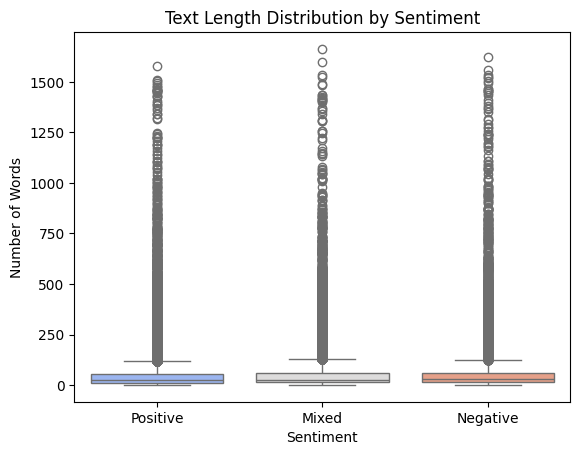

In [ ]:
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

sns.boxplot(data=df, x="label", y="text_length", palette="coolwarm")
plt.title("Text Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.show()


# 3. Text Preprocessing & Cleaning

✔ Reduces noise in the dataset, making it easier for models to learn meaningful patterns.

✔ Improves accuracy by removing irrelevant symbols, stopwords, and normalizing Arabic words.

✔ Prepares text for machine learning & deep learning models by standardizing input.

In [ ]:
# ==============================
# 🔹 NLTK Setup & Stopwords Download
# ==============================

NLTK_PATH = os.path.join(os.path.expanduser('~'), 'nltk_data')
os.makedirs(NLTK_PATH, exist_ok=True)
nltk.data.path = [NLTK_PATH] + nltk.data.path

REQUIRED_PACKAGES = ['punkt', 'stopwords']
for pkg in REQUIRED_PACKAGES:
    try:
        nltk.data.find(f'tokenizers/{pkg}')
    except LookupError:
        nltk.download(pkg, download_dir=NLTK_PATH, quiet=True)

try:
    ARABIC_STOPWORDS = set(stopwords.words('arabic'))
except LookupError:
    nltk.download('stopwords', download_dir=NLTK_PATH, quiet=True)
    ARABIC_STOPWORDS = set(stopwords.words('arabic'))

# ==============================
# 🔹 Helper Functions
# ==============================

def remove_emojis(text):
    """Removes all emojis and symbolic characters."""
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags
        u"\U00002500-\U00002BEF"  # Misc symbols
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed chars
        u"\U0001F900-\U0001F9FF"  # Supplemental symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols extended-A
        "]+", flags=re.UNICODE
    )

    text = emoji.replace_emoji(text, replace='')
    return emoji_pattern.sub(r'', text)

def remove_unimportant_chars(text):
    """Removes special characters, currency, math symbols, and box drawing characters."""
    text = re.sub(r'[§©®™€£¥¢°¿¡¬¦÷×±−√∆≈≠≤≥∞µ∂∑∏⌐◘○◙♂♀♪♫☼►◄↕‼¶§▬↨↑↓→←∟↔▲▼]', '', text)
    text = re.sub(r'[₩฿₳₴₵₲₪₭₮₯₰₱₲₳₴₵₶₷₸₹₺]', '', text)
    text = re.sub(r'[┌┐└┘├┤┬┴┼═║╒╓╔╕╖╗╘╙╚╛╜╝╞╟╠╡╢╣╤╥╦╧╨╩╪╫╬]', '', text)
    return text

def remove_tashkeel(text):
    """Removes Arabic diacritics (Tashkeel) including Fatha, Damma, Kasra, Shadda, and Tanween."""
    tashkeel_pattern = re.compile(r"[\u064B-\u065F]")  # Arabic diacritics range
    return tashkeel_pattern.sub("", text)

# ==============================
# 🔹 Main Text Cleaning Function
# ==============================

def clean_text(text):
    """Performs text normalization, diacritic removal, tokenization, and stopword removal."""
    if not isinstance(text, str) or not text.strip():
        return ''

    # Lowercase and strip spaces
    text = text.lower().strip()

    # Remove URLs, hashtags, mentions, and numbers
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\d+', '', text)

    # Remove tashkeel (diacritics)
    text = remove_tashkeel(text)

    # Remove special characters & emojis
    text = remove_emojis(text)
    text = remove_unimportant_chars(text)

    # Remove email addresses and HTML entities
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'&\w+;', '', text)

    # Normalize Arabic letters
    text = re.sub(r'[إأٱآا]', 'ا', text)
    text = re.sub(r'[ى]', 'ي', text)
    text = re.sub(r'[ؤئ]', 'ء', text)

    # Remove punctuation and special symbols
    text = re.sub(r'[^\w\s\u0600-\u06FF]', ' ', text)

    # Tokenization & Stopword Removal
    try:
        tokens = word_tokenize(text)
    except:
        tokens = text.split()

    tokens = [t for t in tokens if t not in ARABIC_STOPWORDS and len(t) > 1]

    return ' '.join(tokens).strip()

# ==============================
#  Apply Cleaning to Dataset
# ==============================

df['cleaned_text'] = df['text'].apply(clean_text)

# ==============================
#  Verification & Sample Output
# ==============================

# Apply to DataFrame
df['cleaned_text'] = df['text'].apply(clean_text)
# 7. Verify first result
print(df.head(2))
# Test Example Sentence
test_sentence = "مَرْحَبًا بِالْعَالَمِ! هَذَا مِثَالٌ عَلَى النَّصِّ الْعَرَبِيِّ مَعَ التَّشْكِيلِ 😊 http://example.com @user123"
print("\nOriginal Text:", test_sentence)
print("Cleaned Text:", clean_text(test_sentence))


      label                                               text  word_count  \
0  Positive  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...           9   
1  Positive  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...          53   

   text_length                                       cleaned_text  
0            9  ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ا...  
1           53  احد اسباب نجاح الامارات ان شخص الدولة يعشق ترا...  


In [ ]:
text = "مرحبا بالعالم! هذا مثالٌ على النص العربي مع الرموز 😊 http://example.com @user123"
clean = clean_text(text)
print(clean)

مرحبا بالعالم مثالٌ علي النص العربي الرموز


In [ ]:
df['cleanedtext'] = df['text'].apply(clean_text)

# Display results
print(df.head())

      label                                               text  word_count  \
0  Positive  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...           9   
1  Positive  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...          53   
2  Positive  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...          48   
3  Positive  خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...         107   
4  Positive  ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...          15   

   text_length                                       cleaned_text  \
0            9  ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ا...   
1           53  احد اسباب نجاح الامارات ان شخص الدولة يعشق ترا...   
2           48  هادفة وقوية تنقلك صخب شوارع القاهرة الي هدوء ج...   
3          107  خلصنا مبدءيا اللي مستني ابهار زي الفيل الازرق ...   
4           15  ياسات جلوريا جزء يتجزا دبي فندق متكامل الخدمات...   

                                         cleanedtext  
0  ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ا...  
1  احد

Custom NLTK path ensures stability across different environments

Try-Except blocks prevent unnecessary downloads and handle missing resources dynamically

Arabic stopwords are checked before downloading to optimize runtime

Text stemming reduces words to their root form, making sentiment classification more effective

Final dataframe column cleanedtextnew stores preprocessed text, ready for model training

In [ ]:
# 1.Set up a custom directory for NLTK data storage.
#    This ensures that required resources are stored in a known location
NLTK_PATH = os.path.join(os.path.expanduser('~'), 'nltk_data')
os.makedirs(NLTK_PATH, exist_ok=True)  # Create directory if it doesn't exist

# 2.sure NLTK prioritizes our custom path for downloading and loading resources
nltk.data.path = [NLTK_PATH] + nltk.data.path

# 3. Download necessary NLTK resources if they are missing.
#    'punkt' -> Tokenizer for splitting text into words
#    'stopwords' -> Predefined list of common words to remove
#    'punkt_tab' -> (Possibly redundant, but ensures proper tokenizer functioning)
REQUIRED_PACKAGES = ['punkt', 'stopwords', 'punkt_tab']
for pkg in REQUIRED_PACKAGES:
    try:
        nltk.data.find(f'tokenizers/{pkg}')  # Check if package is already downloaded
    except LookupError:
        nltk.download(pkg, download_dir=NLTK_PATH, quiet=True)  # Download if missing

# 4. Load Arabic stopwords, downloading them if they are missing.
#    These stopwords are essential for filtering out common words like "و", "في", "على".
try:
    ARABIC_STOPWORDS = set(stopwords.words('arabic'))
except LookupError:
    nltk.download('stopwords', download_dir=NLTK_PATH, quiet=True)
    ARABIC_STOPWORDS = set(stopwords.words('arabic'))

# -------------------------------
# Text Processing: Stemming
# -------------------------------
def process_text(text):
    """
    Applies Arabic stemming using ISRIStemmer.
    - Tokenizes text into words
    - Reduces words to their root form (e.g., "يذهبون" → "ذهب")
    """
    stemmer = nltk.ISRIStemmer()  # Initialize the Arabic stemmer****
    word_list = nltk.word_tokenize(text)  # Tokenize the input text
    word_list = [stemmer.stem(w) for w in word_list]  # Apply stemming to each word
    return ' '.join(word_list)  # Return processed text as a single string


df['cleanedtextnew'] = df['cleanedtext'].apply(process_text)


df.head()


,label,text,word_count,text_length,cleaned_text,cleanedtext,cleanedtextnew
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,9,9,ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ا...,ممتاز نوعا النظافة والموقع والتجهيز والشاطيء ا...,متز نوع نظف وقع جهز شاطيء طعم
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,53,53,احد اسباب نجاح الامارات ان شخص الدولة يعشق ترا...,احد اسباب نجاح الامارات ان شخص الدولة يعشق ترا...,احد سبب نجح امر ان شخص دول عشق ترب نحب امر ومض...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,48,48,هادفة وقوية تنقلك صخب شوارع القاهرة الي هدوء ج...,هادفة وقوية تنقلك صخب شوارع القاهرة الي هدوء ج...,هدف وقي نقل صخب شرع قهر الي هدء جبل شيش عرف عل...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,107,107,خلصنا مبدءيا اللي مستني ابهار زي الفيل الازرق ...,خلصنا مبدءيا اللي مستني ابهار زي الفيل الازرق ...,خلص بدء الل مست بهر زي فيل زرق ميقراش احس حمد ...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,15,15,ياسات جلوريا جزء يتجزا دبي فندق متكامل الخدمات...,ياسات جلوريا جزء يتجزا دبي فندق متكامل الخدمات...,ياس جلر جزء تجز دبي ندق كامل خدم ريح نفس وجد


# 4. Model Training & Evaluation

This section covers training and evaluating sentiment analysis models using both machine learning (SVM, Random Forest) and deep learning (LSTM).

In [ ]:
from sklearn.model_selection import train_test_split
x, y = df['cleanedtextnew'], df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(len(x_train))
print(len(y_train))h
print(len(x_test))
print(len(y_test))

69999
69999
30000
30000


✅ Uses TF-IDF vectorization to convert text into numerical features.

✅ Trains an SVM model with an RBF kernel for better classification.

✅ Saves the model for future predictions.

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
vectorizer = TfidfVectorizer()
clf = SVC(kernel='rbf')#non-linear
pipe = make_pipeline(vectorizer, clf)
pipe.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:

y_pred = pipe.predict(x_test)
accuracy_score(y_test, y_pred)



0.6525

In [ ]:
import joblib

# Save the trained pipeline
joblib.dump(pipe, "svm_pipeline.pkl")


['svm_pipeline.pkl']

✅ Uses a Random Forest classifier with 50 estimators for robust performance.

✅ Compares performance with SVM using accuracy scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Ensure x and y have consistent lengths before splitting
x, y = df['cleanedtextnew'], df['label']
x, y = x[:min(len(x), len(y))], y[:min(len(x), len(y))] # Trim to the minimum length

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Check the lengths of the splits
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

# Proceed with model training
pipe2 = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=50))
pipe2.fit(x_train, y_train) # Should now work without error

69999
69999
30000
30000


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50))])

In [ ]:
y_pred = pipe2.predict(x_test)
accuracy_score(y_test, y_pred)

0.6119666666666667

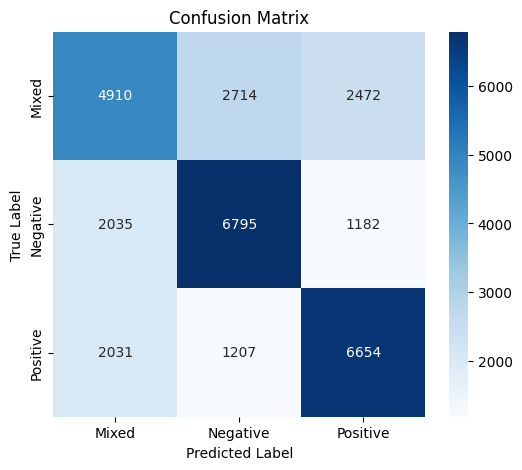

              precision    recall  f1-score   support

       Mixed       0.55      0.49      0.51     10096
    Negative       0.63      0.68      0.66     10012
    Positive       0.65      0.67      0.66      9892

    accuracy                           0.61     30000
   macro avg       0.61      0.61      0.61     30000
weighted avg       0.61      0.61      0.61     30000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


y_pred = pipe2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)  # Get unique class labels
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
import joblib

# Save the trained pipeline
joblib.dump(pipe2, "RandFores_pipeline.pkl")


['RandFores_pipeline.pkl']

**over fitting problem**

✅ Uses an Embedding layer to represent words as dense vectors.

✅ Stacked LSTM layers for better feature learning.

✅ Trained for 10 epochs with an Adam optimizer.

but overfitting problem when i compare the train-acc and val-acc

In [ ]:
'''
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# ---Encode labels (convert text labels to numerical)---
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert to 0,1,2
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=3)
y_test_onehot = to_categorical(y_test_encoded, num_classes=3)

# ---Tokenization---
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# ---Padding---
max_len = 100
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len)
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len)


model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Multi-class output
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x_train_pad, y_train_onehot, epochs=10, batch_size=32, validation_data=(x_test_pad, y_test_onehot))


loss, acc = model.evaluate(x_test_pad, y_test_onehot)
print(f"LSTM Accuracy: {acc:.2f}")'''


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# ---Encode labels (convert text labels to numerical)---
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert to 0,1,2
y_test_encoded = label_encoder.transform(y_test)

# ---Convert labels to one-hot encoding---
y_train_onehot = to_categorical(y_train_encoded, num_classes=3)
y_test_onehot = to_categorical(y_test_encoded, num_classes=3)

# ---Tokenization---
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  # ---Handle unseen words---
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# ---Padding---
max_len = 100
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post', truncating='post')

# ---Build LSTM Model with Bidirectional Layer & Dropout---
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),  # --Bidirectional for better context
    LSTM(32, dropout=0.3, recurrent_dropout=0.3),  # --Dropout to prevent overfitting
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # --Multi-class output
])

#Adam optimizer & learning rate tuning
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
45i
#Train model
model.fit(x_train_pad, y_train_onehot, epochs=15, batch_size=64, validation_data=(x_test_pad, y_test_onehot))

#Evaluation step
loss, acc = model.evaluate(x_test_pad, y_test_onehot)
print(f"LSTM Accuracy: {acc:.2f}")


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 621s 555ms/step - accuracy: 0.3330 - loss: 1.0990 - val_accuracy: 0.3358 - val_loss: 1.0986
Epoch 2/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 628s 561ms/step - accuracy: 0.3403 - loss: 1.0986 - val_accuracy: 0.3391 - val_loss: 1.0985
Epoch 3/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 616s 555ms/step - accuracy: 0.3466 - loss: 1.0954 - val_accuracy: 0.3376 - val_loss: 1.0975
Epoch 4/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 620s 553ms/step - accuracy: 0.3563 - loss: 1.0817 - val_accuracy: 0.3373 - val_loss: 1.1050
Epoch 5/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 616s 548ms/step - accuracy: 0.3732 - loss: 1.0643 - val_accuracy: 0.3379 - val_loss: 1.1147
Epoch 6/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 628s 553ms/step - accuracy: 0.3790 - loss: 1.0525 - val_accuracy: 0.3380 - val_loss: 1.1379
Epoch 7/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 604s 552ms/step - accuracy: 0.3786 - loss: 1.0414 - val_accuracy: 0.3375 - val_loss: 1.1486
Epoch 8/15
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 604s 552ms/step - accuracy: 0.3

In [ ]:
 model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,280,011 (8.70 MB)

 Trainable params: 760,003 (2.90 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,520,008 (5.80 MB)

In [ ]:
model.save("lstm_model.h5")

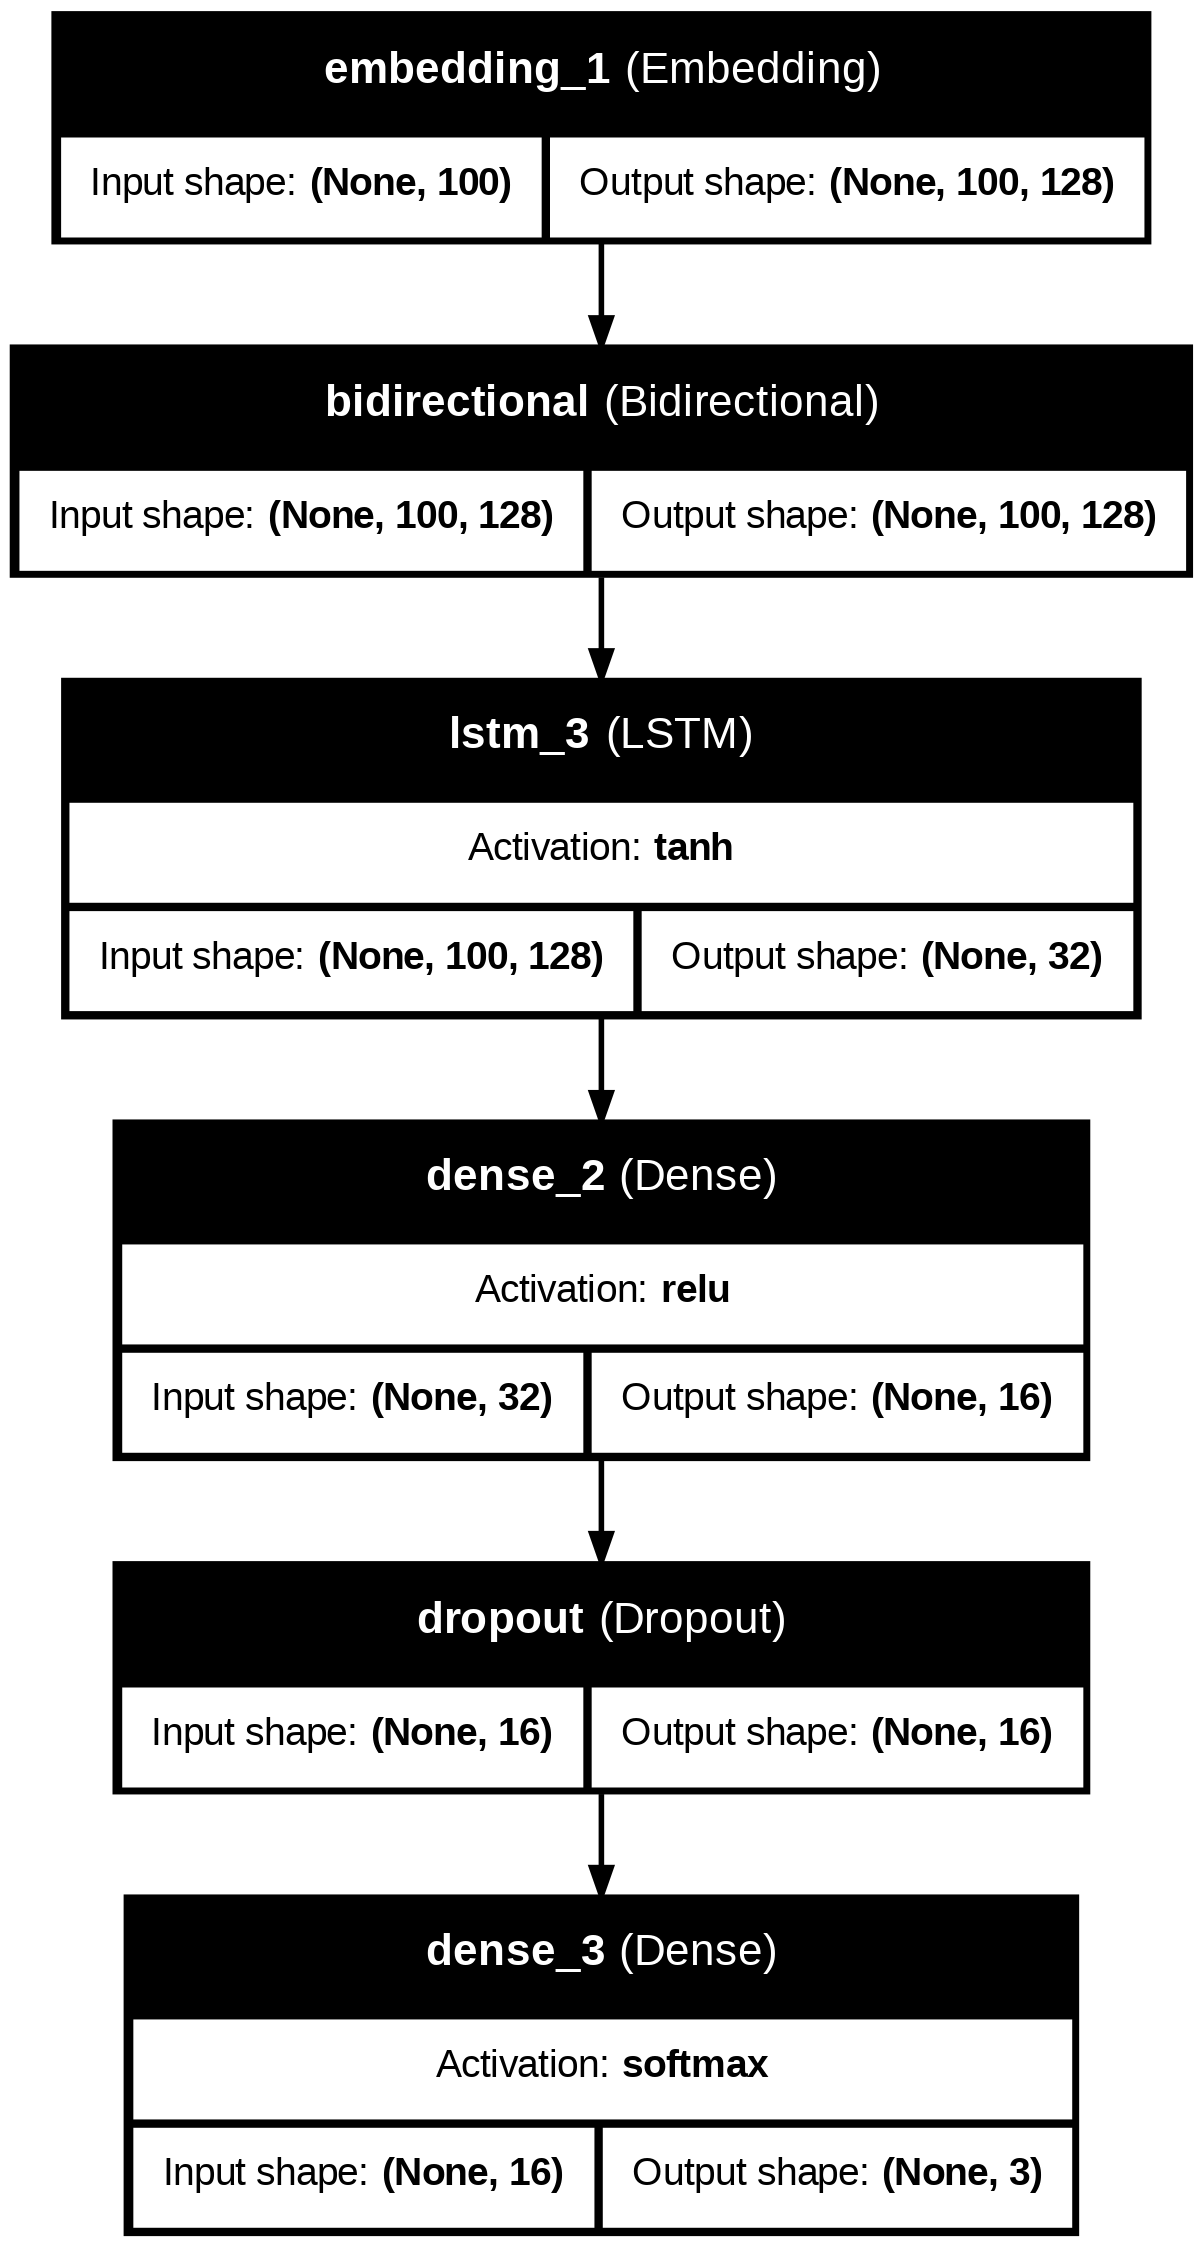

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True,show_layer_activations=True)


938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step


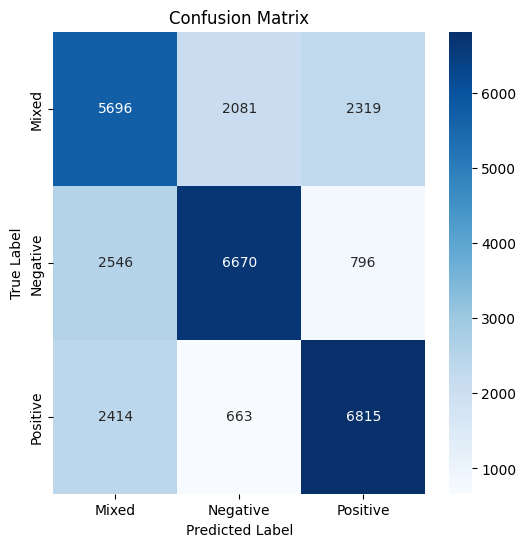

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test_pad)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test_encoded  # Original labels

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
def predict_text(model, tokenizer, label_encoder, text):
    # --Convert text to sequences
    text_seq = tokenizer.texts_to_sequences([text])

    # --Pad sequences to match training input size
    text_pad = pad_sequences(text_seq, maxlen=100, padding='post', truncating='post')

    # --Get prediction
    prediction = model.predict(text_pad)

    # --Get the class with the highest probability
    predicted_class = prediction.argmax(axis=-1)[0]

    # --Convert class number to label
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    return predicted_label

new_text =[ " ولا اشي عجبني كله سيء  ","كل شي حلو ","كان ممتع جدا و مسلي", "مليت جدا بس بصراحة الفكرة كانت رهيبه"] # Arabic example
for i in new_text:
  predicted_label=predict_text(model,tokenizer,label_encoder,i)
  print(f"Predicted Label: {i,predicted_label}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Label: (' ولا اشي عجبني كله سيء  ', 'Negative')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Label: ('كل شي حلو ', 'Positive')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Label: ('كان ممتع جدا و مسلي', 'Positive')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Label: ('مليت جدا بس بصراحة الفكرة كانت رهيبه', 'Mixed')
